#In this Keras project, we will discover how to build and train a convolution neural network for classifying images of Cats and Dogs.



#Dataset: [Cats and Dogs dataset](https://www.kaggle.com/c/dogs-vs-cats/data)
##The dataset includes 25,000 images with equal numbers of labels for cats and dogs.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from tqdm import tqdm
import os                  
from random import shuffle 
import shutil
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_dir='/content/gdrive/My Drive/Dog and Cat'
train_dir=os.path.join(base_dir,'/content/gdrive/My Drive/Dog and Cat/training_set/training_set')
validation_dir=os.path.join(base_dir,'/content/gdrive/My Drive/Dog and Cat/test_set/test_set')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')
print(train_cats_dir)
print(train_dogs_dir)

/content/gdrive/My Drive/Dog and Cat/training_set/training_set/cats
/content/gdrive/My Drive/Dog and Cat/training_set/training_set/dogs


In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.531.jpg', 'cat.3668.jpg', 'cat.3516.jpg', 'cat.3274.jpg', 'cat.3421.jpg', 'cat.3996.jpg', 'cat.3294.jpg', 'cat.3322.jpg', 'cat.3247.jpg', 'cat.619.jpg']
['dog.3697.jpg', 'dog.3960.jpg', 'dog.3435.jpg', 'dog.3998.jpg', 'dog.3712.jpg', 'dog.3905.jpg', 'dog.3489.jpg', 'dog.602.jpg', 'dog.3434.jpg', 'dog.3902.jpg']


In [5]:
def label_img(img):
    word_label = img.split('.')[-3]
    
    if word_label == 'cat': 
        shutil.move(os.path.join(train_dir,img),train_cats_dir)
                                 
    elif word_label == 'dog': 
        shutil.move(os.path.join(train_dir,img),train_dogs_dir)

In [6]:
def create_train_data():
    for img_l in tqdm(os.listdir(train_dir)):
        if(img_l=='dogs' or img_l=='cats'):
            continue
        label = label_img(img_l)

In [7]:
#create_train_data()

In [8]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))
print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 4001
total training dog images : 4006
total validation cat images : 1012
total validation dog images : 1013


In [9]:
import tensorflow as tf 
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform

In [10]:
model=tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),    
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512,activation='relu'),
       tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150,150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
history=model.fit(train_generator,validation_data=validation_generator,
                  steps_per_epoch=100,
                  epochs=5,
                  validation_steps=50,
                  verbose=1
                  )

Epoch 1/5
100/100 [==============================] - 730s 7s/step - loss: 0.8321 - accuracy: 0.5610 - val_loss: 0.6543 - val_accuracy: 0.5650
Epoch 2/5
100/100 [==============================] - 558s 6s/step - loss: 0.6885 - accuracy: 0.5745 - val_loss: 0.6393 - val_accuracy: 0.6120
Epoch 3/5
100/100 [==============================] - 616s 6s/step - loss: 0.6653 - accuracy: 0.5980 - val_loss: 0.6074 - val_accuracy: 0.6700
Epoch 4/5
100/100 [==============================] - 289s 3s/step - loss: 0.6444 - accuracy: 0.6343 - val_loss: 0.5750 - val_accuracy: 0.7030
Epoch 5/5
100/100 [==============================] - 202s 2s/step - loss: 0.6474 - accuracy: 0.6292 - val_loss: 0.5840 - val_accuracy: 0.6780


In [15]:
model.save('/content/gdrive/My Drive/DOGCATtrained1.h5')

In [16]:
model2=tf.keras.models.load_model('/content/gdrive/My Drive/DOGCATtrained1.h5')

In [17]:
eval=model2.evaluate(validation_generator)
print("Loss is : ",eval[0])
print("Accuracy is : ",eval[1])

102/102 [==============================] - 23s 228ms/step - loss: 0.5810 - accuracy: 0.6822
Loss is :  0.5809913277626038
Accuracy is :  0.682155191898346


Saving dog1.jpg to dog1.jpg


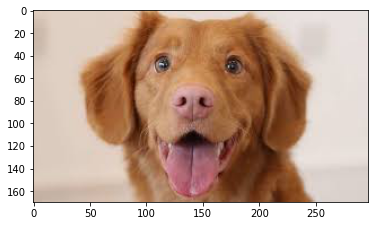

[1.]
dog1.jpg is a Dog


In [22]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys(): 
  path='/content/' + fn
  img=image.load_img(path, target_size=(150,150))
  image_eg=image.load_img(path)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  
  classes = model2.predict(images, batch_size=10)
  plt.imshow(image_eg)
  plt.show()
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Dog")
    
  else:
    print(fn + " is a Cat")

Saving cat.jpg to cat (1).jpg


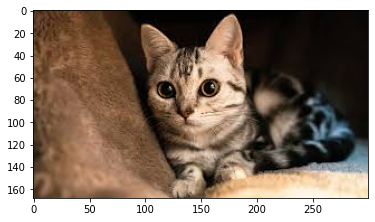

[0.]
cat.jpg is a Cat


In [23]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys(): 
  path='/content/' + fn
  img=image.load_img(path, target_size=(150,150))
  image_eg=image.load_img(path)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  
  classes = model2.predict(images, batch_size=10)
  plt.imshow(image_eg)
  plt.show()
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Dog")
    
  else:
    print(fn + " is a Cat")